In [1]:
from upsetplot import plot
from matplotlib import pyplot
from upsetplot import UpSet
from upsetplot import from_contents
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from upsetplot import from_indicators
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
figdir="/data/Phillippy/projects/HG002_Masseq/figure"

In [75]:
df_ori = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/HSM.known_imprinted.bed", sep = '\t', header = None)
df_ori.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,chr1,11044412,11044709,298,37,0.657271,0.415610,0.241661,174.248267,chr1:11044412-11044709,chr1,11044370,11044544,Maternal,chr1-mat-1,PTCHD2,Hernandez
1,chr1,32328990,32329191,202,10,0.789138,0.524605,0.264533,48.324914,chr1:32328990-32329191,chr1,32329102,32329320,Maternal,chr1-mat-3,ZBTB8B,Joshi
2,chr1,32329270,32329395,126,7,0.762157,0.426633,0.335524,36.350951,chr1:32329270-32329395,chr1,32329102,32329320,Maternal,chr1-mat-3,ZBTB8B,Joshi
3,chr1,39383967,39384566,600,41,0.570428,0.228099,0.342329,322.601761,chr1:39383967-39384566,chr1,39384177,39384444,Maternal,chr1-mat-4,BMP8A,Akbari
4,chr1,67924248,67924995,748,37,0.769939,0.363026,0.406912,321.466130,chr1:67924248-67924995,chr1,67924206,67925480,Maternal,chr1-mat-6,"DIRAS3,DIRAS3_Ex2,GNG12-AS1","Akbari,Court,Hernandez,Joshi,Zink"


In [76]:
df_ori['DMR_DSS_haplotype'] = df_ori.apply(lambda row: 'Maternal' if row[8] > 0 else 'Paternal', axis=1)

In [77]:
tab = pd.DataFrame(df_ori.groupby([13,'DMR_DSS_haplotype']).size()).reset_index()
tab.columns = ['known_imprinted','DMR_DSS_haplotype','freq']

In [78]:
tab = tab.pivot(index='known_imprinted', columns='DMR_DSS_haplotype', values='freq')

In [79]:
tab.transpose()

known_imprinted,Maternal,Paternal
DMR_DSS_haplotype,,
Maternal,138,2
Paternal,4,98


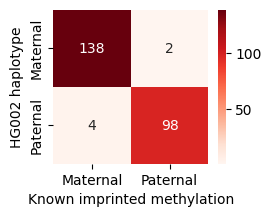

In [80]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(tab.transpose(), annot=True, fmt="d", cmap='Reds')
ax.set_ylabel('HG002 haplotype')
ax.set_xlabel('Known imprinted methylation')
plt.savefig(figdir + '/countHeatmap.known_vs_hg002.png', bbox_inches='tight',dpi=300,transparent=True)

In [81]:
df = tab.replace('Maternal', True)
df = df.replace('Paternal', False)

In [82]:
df

DMR_DSS_haplotype,Maternal,Paternal
known_imprinted,,
Maternal,138,4
Paternal,2,98


In [83]:
frequency = df.groupby(['known_imprinted', 'DMR_DSS_haplotype']).size()
frequency

DMR_DSS_haplotype    1
known_imprinted      1
dtype: int64

In [84]:
df = df_ori[[13,5,6]]
df.columns = ['known_imprinted',"5","6"]
df

,known_imprinted,5,6
0,Maternal,0.657271,0.415610
1,Maternal,0.789138,0.524605
2,Maternal,0.762157,0.426633
3,Maternal,0.570428,0.228099
4,Maternal,0.769939,0.363026
...,...,...,...
237,Maternal,0.711511,0.251985
238,Maternal,0.934303,0.162129
239,Maternal,0.775403,0.100223
240,Maternal,0.642814,0.384820


In [85]:

# Melt the DataFrame to reshape it
df_melted = pd.melt(df, id_vars='known_imprinted', var_name='source', value_name='value')

# Rename the 'known_imprinted' column to 'category'
df_melted = df_melted.rename(columns={'known_imprinted': 'category'})

# Map the source values to 'mat' and 'pat'
df_melted['source'] = df_melted['source'].map({'5': 'Maternal', '6': 'Paternal'})

print(df_melted)

     category    source     value
0    Maternal  Maternal  0.657271
1    Maternal  Maternal  0.789138
2    Maternal  Maternal  0.762157
3    Maternal  Maternal  0.570428
4    Maternal  Maternal  0.769939
..        ...       ...       ...
479  Maternal  Paternal  0.251985
480  Maternal  Paternal  0.162129
481  Maternal  Paternal  0.100223
482  Maternal  Paternal  0.384820
483  Maternal  Paternal  0.351370

[484 rows x 3 columns]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Paternal_Maternal v.s. Paternal_Paternal: t-test independent samples with Bonferroni correction, P_val=6.891e-63 stat=-2.501e+01
Maternal_Maternal v.s. Maternal_Paternal: t-test independent samples with Bonferroni correction, P_val=9.756e-81 stat=2.727e+01


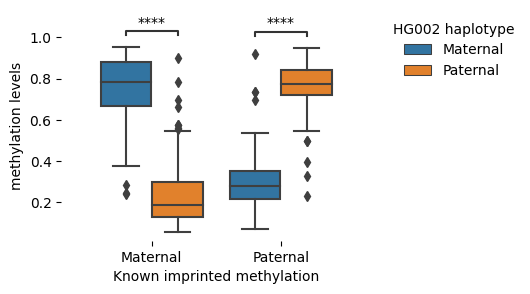

In [86]:
fig, ax = plt.subplots(figsize=(4, 3))

x = "category"
y = "value"
hue = "source"
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue,
                # frameon = False,
                )
add_stat_annotation(ax, data=df_melted, x=x, y=y, hue=hue,
                    box_pairs=[(("Maternal", "Maternal"), ("Maternal", "Paternal")),
                                 (("Paternal", "Maternal"), ("Paternal", "Paternal"))
                                ],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)

ax.set_ylabel('methylation levels')
ax.set_xlabel('Known imprinted methylation')


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.legend(title='HG002 haplotype' , loc='upper left', bbox_to_anchor=(1.03, 1),frameon=False)

plt.savefig(figdir + '/boxplot.methLevel.matvspat.png', bbox_inches='tight',dpi=300,transparent=True)

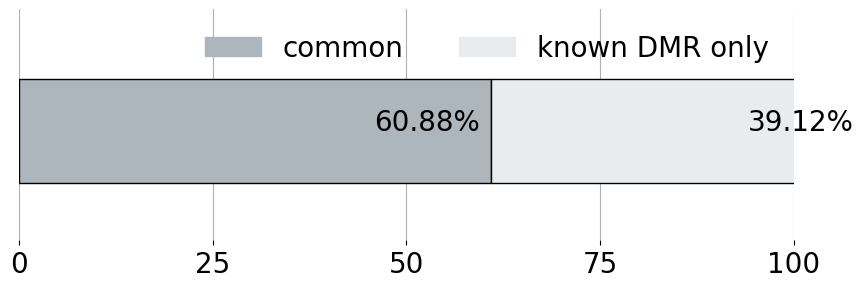

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Remove plt.figure() line

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figsize here

start = 0
never_ori = 263
seldom_ori = 169
undecided = 0


col1='#adb5bd'
col2='#e9ecef'

never = round((never_ori / (never_ori + seldom_ori)) * 100,2)
seldom = round((seldom_ori / (never_ori + seldom_ori)) * 100,2)

ax.broken_barh([(start, never), (never, 100)], [10, 9], facecolors=(col1,col2),
              edgecolor='black')
ax.set_ylim(5, 15)
ax.set_xlim(0, 100)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([20, 25])
ax.set_xticks([0, 25, 50, 75, 100])
plt.xticks(fontsize=20)
ax.set_axisbelow(True)
ax.set_yticks([])
ax.set_ylabel('')
ax.grid(axis='x')
ax.text(never - 15, 14.5, str(never) + "%", fontsize=20, rotation = 0)
ax.text((never + seldom) - 6, 14.5, str(seldom) + "%", fontsize=20)

#fig.suptitle('The percent of common between known DMR and HG002 haplotype specific DMR', fontsize=15)

leg1 = mpatches.Patch(color=col1, label='common')
leg2 = mpatches.Patch(color=col2, label='known DMR only')
ax.legend(handles=[leg1, leg2], ncol=2, fontsize = 20, frameon=False)

plt.savefig(figdir + '/broken_bar_plot.amongKnownDMR.png',dpi=300,transparent=True)
plt.show()


In [88]:
knownonly_mat = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/hg002.mat.known_only.median.bed",
                            sep ='\t', 
                            header = None)
knownonly_mat = knownonly_mat[[3,4,7]]
knownonly_mat.columns = ['known_hap','region','mat']
knownonly_mat.head()

,known_hap,region,mat
0,Maternal,chr1-mat-2,0
1,Maternal,chr1-mat-5,100
2,Maternal,chr1-mat-7,92.59
3,Maternal,chr1-mat-8,93.75
4,Maternal,chr10-mat-3,37.23


In [89]:
knownonly_pat = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/hg002.pat.known_only.median.bed",
                            sep ='\t', 
                            header = None)
knownonly_pat = knownonly_pat[[4,7]]
knownonly_pat.columns = ['region','pat']
knownonly_pat.head()

,region,pat
0,chr1-mat-2,0
1,chr1-mat-5,100
2,chr1-mat-7,90.43
3,chr1-mat-8,94.115
4,chr10-mat-3,51.72


In [90]:
knownonly = pd.merge(knownonly_mat,knownonly_pat, on = ['region'])

del knownonly['region']
knownonly.head(3)

,known_hap,mat,pat
0,Maternal,0,0
1,Maternal,100,100
2,Maternal,92.59,90.43


In [107]:

# Melt the DataFrame to reshape it
df_melted = pd.melt(knownonly, id_vars='known_hap', var_name='source', value_name='value')

# Rename the 'known_imprinted' column to 'category'
df_melted = df_melted.rename(columns={'known_hap': 'category'})

# Map the source values to 'mat' and 'pat'
df_melted['source'] = df_melted['source'].map({'mat': 'Maternal', 'pat': 'Paternal'})
# Assuming df_melted is your DataFrame
df_melted['value'] = pd.to_numeric(df_melted['value'], errors='coerce')
df_melted['value'] = df_melted['value']*.01
print(df_melted)

     category    source   value
0    Maternal  Maternal  0.0000
1    Maternal  Maternal  1.0000
2    Maternal  Maternal  0.9259
3    Maternal  Maternal  0.9375
4    Maternal  Maternal  0.3723
..        ...       ...     ...
267  Maternal  Paternal  0.9787
268  Maternal  Paternal  0.9545
269  Maternal  Paternal  0.0000
270  Maternal  Paternal  1.0000
271  Maternal  Paternal  1.0000

[272 rows x 3 columns]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Paternal_Maternal v.s. Paternal_Paternal: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=4.218e-02
Maternal_Maternal v.s. Maternal_Paternal: t-test independent samples with Bonferroni correction, P_val=3.495e-01 stat=1.362e+00


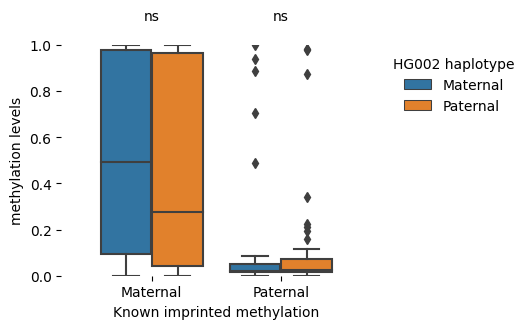

In [109]:
fig, ax = plt.subplots(figsize=(4, 3))

x = "category"
y = "value"
hue = "source"
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue,
                # frameon = False,
                )
add_stat_annotation(ax, data=df_melted, x=x, y=y, hue=hue,
                    box_pairs=[(("Maternal", "Maternal"), ("Maternal", "Paternal")),
                                 (("Paternal", "Maternal"), ("Paternal", "Paternal"))
                                ],
                    test='t-test_ind', text_format='star', loc='inside', verbose=2)

ax.set_ylabel('methylation levels')
ax.set_xlabel('Known imprinted methylation')


ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,1)
plt.legend(title='HG002 haplotype' , loc='upper left', bbox_to_anchor=(1.03, 1),frameon=False)

plt.savefig(figdir + '/boxplot.methLevel.matvspat.inknownonly.png', bbox_inches='tight',dpi=300,transparent=True)

In [95]:
hsm = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/HSM.tsv",
                 sep = '\t',
                 header = None)
hsm['len'] = hsm[2]-hsm[1]
hsm.head(3)

,0,1,2,3,4,5,6,7,8,9,len
0,chr1,29675,29983,309,7,0.722980,0.317880,0.405100,35.956545,chr1:29675-29983,308
1,chr1,31003,31385,383,18,0.881259,0.643392,0.237867,95.516186,chr1:31003-31385,382
2,chr1,31579,32695,1117,45,0.197803,0.662006,-0.464203,-462.182853,chr1:31579-32695,1116


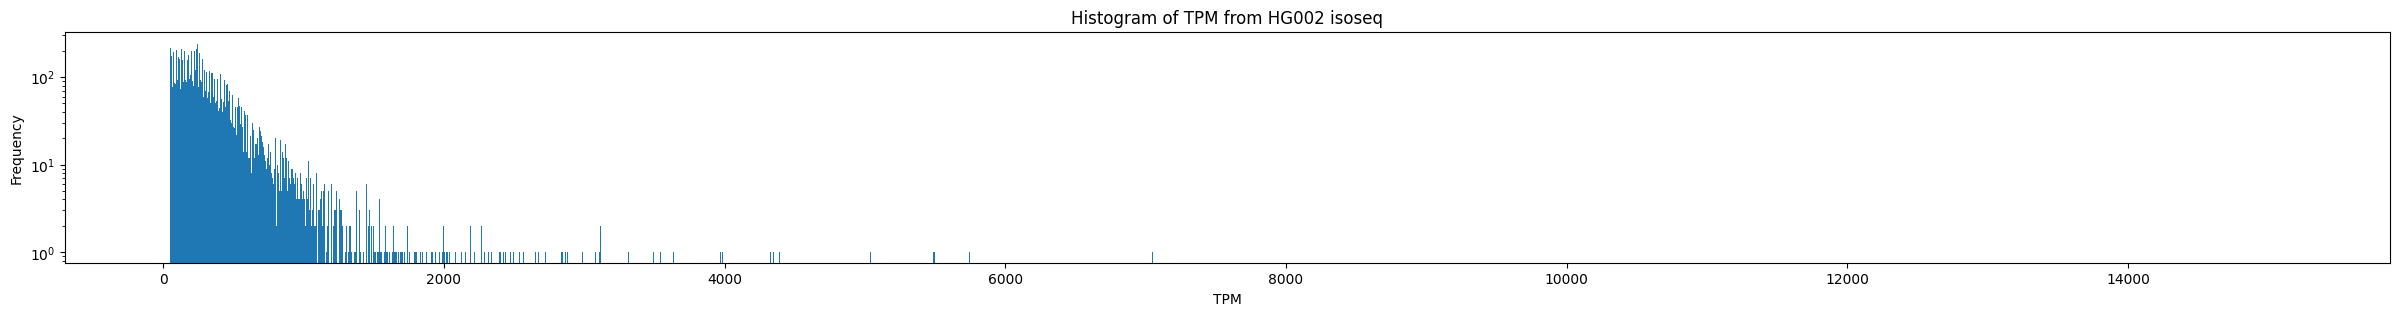

In [102]:
fig = plt.figure(figsize=(30, 3))
plt.hist(hsm.len, bins=10000,log=True)

# Adding x-axis and y-axis labels
plt.xlabel('TPM', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of TPM from HG002 isoseq', fontsize=12)
#plt.ylim(0,10)
plt.savefig(figdir + '/hist.hsm_hg002.len.png', bbox_inches='tight',dpi=300,transparent=True)

plt.show() 

In [98]:


idmr = pd.read_csv('/vf/users/Phillippy/projects/HG002_Masseq/10.interpretation/HST-HSM/iDMR-v1.chm13_coor.bed',
                 sep = '\t',
                 header = None)
idmr['len'] = idmr[2]-idmr[1]
idmr.head(3)

,0,1,2,3,4,5,6,len
0,chr1,11044370,11044544,Maternal,chr1-mat-1,PTCHD2,Hernandez,174
1,chr1,21120031,21120143,Maternal,chr1-mat-2,"ECE1,LOC100506801",Hernandez,112
2,chr1,32329102,32329320,Maternal,chr1-mat-3,ZBTB8B,Joshi,218


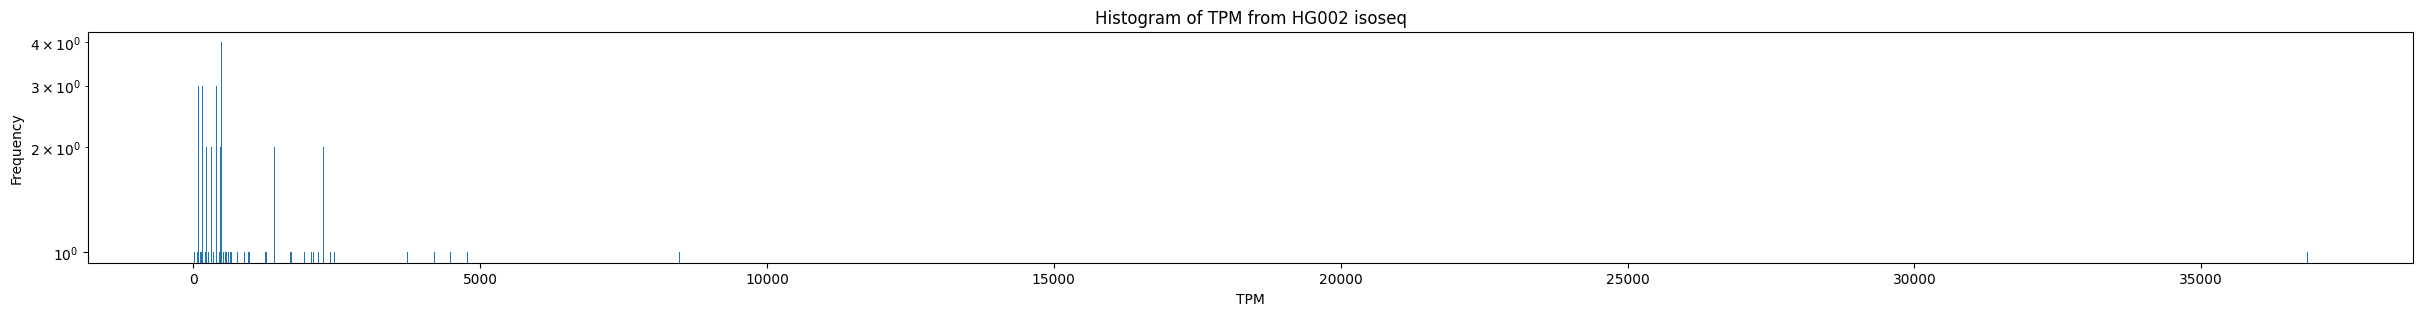

In [101]:
fig = plt.figure(figsize=(30, 3))
plt.hist(idmr.len, bins=10000,log=True)

# Adding x-axis and y-axis labels
plt.xlabel('TPM', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Histogram of TPM from HG002 isoseq', fontsize=12)
# plt.ylim(0,10)
plt.savefig(figdir + '/hist.idmr.len.png', bbox_inches='tight',dpi=300,transparent=True)

plt.show() 